In [7]:
from qiskit import *

In [9]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

In [11]:
circuit.draw()

q1_0: |0>
         
q1_1: |0>
         
 c1_0: 0 
         
 c1_1: 0

In [13]:
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])

In [14]:
circuit.draw()

┌───┐     
q1_0: |0>┤ H ├──■──
         └───┘┌─┴─┐
q1_1: |0>─────┤ X ├
              └───┘
 c1_0: 0 ══════════
                   
 c1_1: 0 ══════════

In [16]:
circuit.measure(qr, cr)
circuit.draw()

┌───┐     ┌─┐   
q1_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q1_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c1_0: 0 ═══════════╩══╬═
                       ║ 
 c1_1: 0 ══════════════╩═

In [17]:
simulator = Aer.get_backend("qasm_simulator")

In [23]:
result = execute(circuit, backend = simulator).result()

In [24]:
print(result.get_counts(circuit))

{'00': 507, '11': 517}


In [26]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
provider = IBMQ.get_provider("ibm-q")

In [29]:
qcomp = provider.get_backend("ibmq_16_melbourne")

In [30]:
job = execute(circuit, backend = qcomp)

In [31]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


In [32]:
from qiskit.tools.visualization import plot_histogram

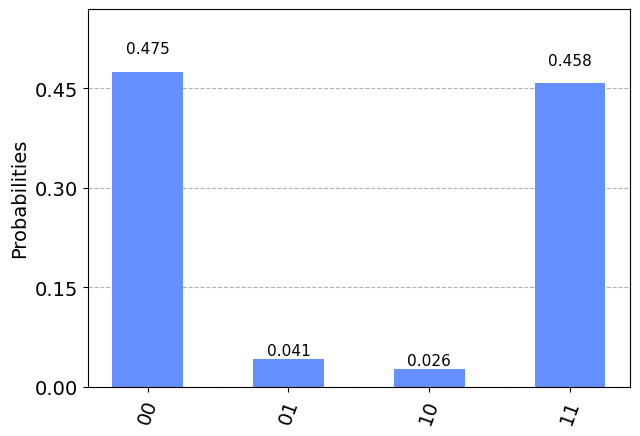

In [33]:
result = job.result()

plot_histogram(result.get_counts(circuit))